# Simulaciones para generar un dataset de hormigoneras

En este documento, generaremos sinteticamente un dataset que refleje la produccion de una hormigonera.

In [19]:
import pandas as pd
import numpy as np
import random
import datetime
from datetime import timedelta
from faker import Faker

In [20]:
drivers = pd.DataFrame()
fake = Faker()

In [21]:
start_date = datetime.date(2015,1,1)
end_date = start_date + timedelta(days=(365*9))
dates = pd.bdate_range(start_date, end_date)

# Choferes

In [22]:
def generate_random_date(start_date):
    max_days = 365 * 9  # 5 años
    random_number_of_days = random.randint(0, max_days)
    return start_date + timedelta(days=random_number_of_days)

In [23]:
drivers["chofer_id"] = [i for i in range(1,50)]
drivers["camion"] = [i for i in range(25,74)]
drivers["edad"] = [random.randint(25,55) for i in range(1,50)]
drivers['fecha_ingreso'] = drivers['chofer_id'].apply(lambda x: generate_random_date(start_date))
drivers['fecha_ingreso'] = pd.to_datetime(drivers['fecha_ingreso'])
drivers["Nombre"] = [fake.name() for i in range(1,50)]

drivers.to_csv('dim_choferes.csv')

In [24]:
drivers.head()

,chofer_id,camion,edad,fecha_ingreso,Nombre
0,1,25,37,2019-12-02,Lacey Baker
1,2,26,33,2023-08-01,Phillip West
2,3,27,39,2021-03-19,Paul Johnson
3,4,28,37,2017-12-12,Monica Davis
4,5,29,49,2022-11-25,Erin Reynolds


# Clientes

In [25]:
def generar_dataframe_clientes(cantidad):
    fake = Faker()
    datos_clientes = []

    for _ in range(cantidad):
        nombre_empresa = fake.company()
        direccion = fake.address()
        telefono = fake.phone_number()
        email = fake.company_email()

        cliente = {
            "Nombre Empresa": nombre_empresa,
            "Dirección": direccion,
            "Teléfono": telefono,
            "Email": email
        }

        datos_clientes.append(cliente)

    # Crear un DataFrame de pandas
    df_clientes = pd.DataFrame(datos_clientes)
    return df_clientes

if __name__ == "__main__":
    cantidad_clientes = 500
    dataframe_clientes = generar_dataframe_clientes(cantidad_clientes)


dataframe_clientes["cliente_id"] = [i for i in range(1,len(dataframe_clientes)+1)]

dataframe_clientes.to_csv('dim_clientes.csv')

In [26]:
dataframe_clientes.head()

,Nombre Empresa,Dirección,Teléfono,Email,cliente_id
0,Lawson Group,"599 Ali Landing Suite 736\nBenjaminborough, WV...",985.093.5867x64371,arnoldkeith@solis.biz,1
1,"Fisher, Wagner and Craig","53516 Flores Unions Apt. 195\nAmandaborough, G...",(837)903-8583,jamesbaker@hernandez-leblanc.org,2
2,Hernandez-Cannon,"887 King Summit\nGonzalesland, MT 42868",(491)812-0899x9485,xcruz@saunders.com,3
3,Schwartz-Sanchez,"84787 Lopez Forks Apt. 378\nEast Derrickland, ...",(543)447-1867x464,ubarnett@summers-hamilton.com,4
4,"Ponce, Robertson and Hardy","4415 Wood Shores\nKellerstad, CO 34297",080-476-0213,collinslauren@kennedy-petersen.info,5


# Formulas

In [27]:
dataframe_formulas = pd.read_excel('formulas_simulacion_hormigoneras.xlsx', sheet_name='formulas')
dataframe_formulas.head()

dataframe_formulas.to_csv('dim_formulas.csv')

In [28]:
dataframe_formulas.head()

,formula_id,Especificada,asentamiento,TMN,cemento,agua,arena,piedra_BI,piedra_6_19,piedra_20_30,aditivo,chances
0,1,21,8,19,309.090909,170,950,0.0,970.909091,0.000000,24.727273,0.10
1,2,21,12,19,318.181818,175,950,0.0,956.818182,0.000000,25.454545,0.30
2,3,21,15,19,327.272727,180,950,0.0,942.727273,0.000000,26.181818,0.10
3,4,21,18,19,336.363636,185,950,0.0,928.636364,0.000000,26.909091,0.05
4,5,21,8,25,309.090909,170,980,0.0,470.454545,470.454545,24.727273,0.15


# Registro de viajes diarios

In [29]:
remito = 1000
minutos_diarios_limite = 10 * 60  # 11 horas por día 660 480
minutos_diarios = 0

meses_invierno = [4, 5, 6, 7, 8]  # Suponiendo que estos son los meses de invierno

# Columnas para el DataFrame de viajes
columnas_viajes = ['chofer_id', 'remito', 'fecha', 'hora_inicio_carga', 'hora_fin_carga', 'cliente_id', 'formula', 'cantidad']

# Lista para almacenar los datos de los viajes
datos_viajes = []

# Inicializar el contador de minutos
contador_minutos = 0

# Bucle principal para simular los viajes
for date in dates:
    for _, chofer_row in drivers.iterrows():

        chofer_id = chofer_row['chofer_id']
        fecha_ingreso = chofer_row['fecha_ingreso']
        if date < fecha_ingreso:
            continue
        
        if date.month in meses_invierno:
            horas_trabajadas = max(0, np.random.normal(8.5, 2))  # Media de 9 horas en invierno
        else:
            horas_trabajadas = max(0, np.random.normal(10, 2))  # Media de 10 horas en otros meses
       
        minutos_trabajados = horas_trabajadas * 60
        # Restablecer el contador de minutos al inicio de cada día
        contador_minutos = 0

        while contador_minutos < minutos_trabajados: # controla que la hora del chofer este entre 8 y 11 horas diarias
            # Calcular la duración del viaje
            duracion_viaje = np.random.normal(loc=180, scale=60) * random.uniform(0.8,1.2)  # 2 horas de media, 40 minutos de desviación estándar

            # Calcular las horas de inicio y fin de carga
            hora_inicio_carga = datetime.datetime(date.year, date.month, date.day, 8, 0) + timedelta(minutes=contador_minutos)
            hora_fin_carga = hora_inicio_carga + timedelta(minutes=duracion_viaje)

            # Seleccionar un cliente al azar
            cliente_id = random.choice(dataframe_clientes["cliente_id"])
            # Seleccionar una formula
            probabilidades_formula = dataframe_formulas["chances"]
            formula = random.choices(dataframe_formulas["formula_id"], weights= probabilidades_formula, k=1)[0]

            # Seleccionar una cantidad
            cantidad = random.randint(6,8)

            # Agregar datos del viaje a la lista
            datos_viaje = [chofer_id, remito, date, hora_inicio_carga, hora_fin_carga, cliente_id, formula, cantidad]
            datos_viajes.append(datos_viaje)

            # Incrementar el contador de minutos
            contador_minutos += duracion_viaje + 10  # 10 minutos de margen entre viajes

            # Incrementar el número de remito
            remito += 1

# Crear un DataFrame de Pandas con los datos de los viajes
df_viajes = pd.DataFrame(datos_viajes, columns=columnas_viajes)

df_viajes.to_csv('fact_viajes.csv')


In [30]:
df_viajes.head()

,chofer_id,remito,fecha,hora_inicio_carga,hora_fin_carga,cliente_id,formula,cantidad
0,14,1000,2015-01-26,2015-01-26 08:00:00.000000,2015-01-26 09:56:34.989045,397,29,8
1,14,1001,2015-01-26,2015-01-26 10:06:34.989045,2015-01-26 14:01:48.467353,313,37,6
2,14,1002,2015-01-26,2015-01-26 14:11:48.467352,2015-01-26 17:23:16.878982,344,26,8
3,14,1003,2015-01-27,2015-01-27 08:00:00.000000,2015-01-27 10:32:23.859577,24,23,7
4,14,1004,2015-01-27,2015-01-27 10:42:23.859577,2015-01-27 13:01:17.738211,390,11,8


In [31]:
df2 = df_viajes

In [32]:
df2['Year'] = df2['fecha'].dt.strftime('%Y')
df2['Month'] = df2['fecha'].dt.strftime('%m')
df2.head()


,chofer_id,remito,fecha,hora_inicio_carga,hora_fin_carga,cliente_id,formula,cantidad,Year,Month
0,14,1000,2015-01-26,2015-01-26 08:00:00.000000,2015-01-26 09:56:34.989045,397,29,8,2015,01
1,14,1001,2015-01-26,2015-01-26 10:06:34.989045,2015-01-26 14:01:48.467353,313,37,6,2015,01
2,14,1002,2015-01-26,2015-01-26 14:11:48.467352,2015-01-26 17:23:16.878982,344,26,8,2015,01
3,14,1003,2015-01-27,2015-01-27 08:00:00.000000,2015-01-27 10:32:23.859577,24,23,7,2015,01
4,14,1004,2015-01-27,2015-01-27 10:42:23.859577,2015-01-27 13:01:17.738211,390,11,8,2015,01


<Axes: xlabel='Year,Month'>

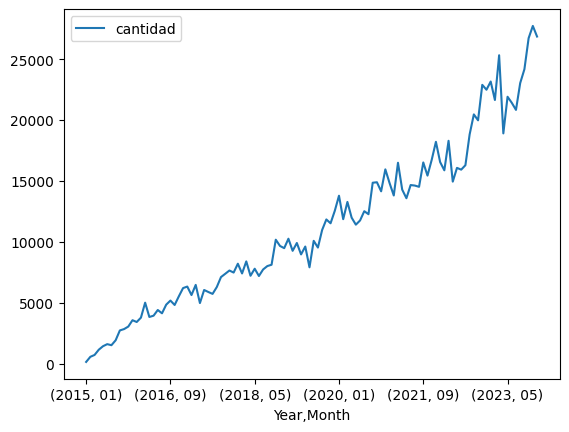

In [33]:
df2[["Year", "Month", "cantidad"]].groupby(['Year','Month']).sum('cantidad').plot()

# Reclamos

In [35]:
chance_de_reclamo = 0.05 # chance que de el viaje contenga un reclamo

# establezco algunos posibles reclamos que podrian suceder
tipos_de_reclamos = ['volumen', 'fisuracion', 'resistencia', 'demoras', 'fragüe', 'asentamiento', 'formula']

# definimos una probabilidad para cada uno de los reclamos, entendiendo que algunos son mas frecuentes que otros
probabilidades_reclamos = [0.1, 0.3, 0.1, 0.15, 0.05, 0.3, 0.05]

remitos = df_viajes["remito"]

# Lista para almacenar datos de reclamos
datos_reclamos = []

for remito in remitos:
    # Verificar si este viaje tiene un reclamo
    if random.random() < chance_de_reclamo:
        # Si hay reclamo, agregar datos a la lista
        tipo_reclamo = random.choices(tipos_de_reclamos, weights=probabilidades_reclamos, k=1)[0]
        datos_reclamo = {"remito": remito, "tipo": tipo_reclamo}
        datos_reclamos.append(datos_reclamo)

# Crear un DataFrame de Pandas con los datos de reclamos
df_reclamos = pd.DataFrame(datos_reclamos)

df_reclamos.to_csv('fact_reclamos.csv')

In [36]:
df_reclamos.head()

,remito,tipo
0,1005,fisuracion
1,1036,asentamiento
2,1037,fisuracion
3,1054,asentamiento
4,1100,fragüe


# Calidad

In [37]:
chance_de_control = 0.15 # chance que de el viaje reciba un control de calidad

# Lista para almacenar datos de controles
datos_controles = []

for remito in remitos:
    # Verificar si este viaje tiene un control de calidad
    if random.random() < chance_de_control:
        # Si hay control, agregar datos a la lista
        # Qué formula fue muestreada
        formula = df_viajes['formula'].loc[df_viajes['remito'] == remito].iloc[0]
        
        # resistencia especificada de la formula muestreada
        especificada = dataframe_formulas['Especificada'].loc[dataframe_formulas['formula_id'] == formula].iloc[0]        
        
        # resultado del muestreo
        resistencia_28 = np.random.normal(loc=(especificada+1.282*3), scale=3) * random.uniform(0.95,1.05)
        resistencia_7 = resistencia_28 * np.random.uniform(0.6, 0.7)
        
        datos_control = {"remito": remito, "formula": formula, "edad": 28, 'especificada': especificada, 'resistencia_7': resistencia_7, 'resistencia_28': resistencia_28}
        datos_controles.append(datos_control)

# Crear un DataFrame de Pandas con los datos de reclamos
df_controles = pd.DataFrame(datos_controles)

df_controles.to_csv('fact_calidad.csv')

In [38]:
df_controles.head()

,remito,formula,edad,especificada,resistencia_7,resistencia_28
0,1004,11,28,25,19.781066,32.413677
1,1014,10,28,25,18.238252,28.705796
2,1015,28,28,35,27.465362,43.585018
3,1059,27,28,30,18.586176,29.173694
4,1073,27,28,30,19.365218,27.965515


## Modelo Estrella

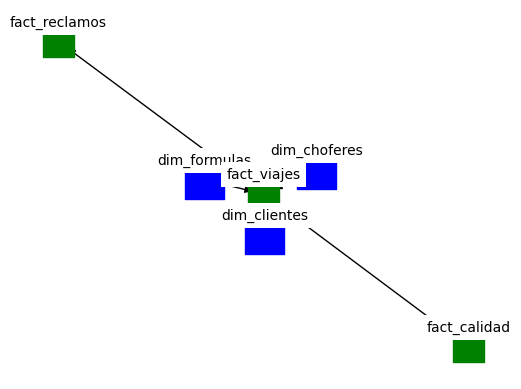

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos con el atributo 'type' que podría ser 'fact' o 'dim'
G.add_node("dim_choferes", type='dim')
G.add_node("dim_clientes", type='dim')
G.add_node("dim_formulas", type='dim')
G.add_node("fact_viajes", type='fact')
G.add_node("fact_reclamos", type='fact')
G.add_node("fact_calidad", type='fact')

# Agregar aristas entre los nodos
edges = [
    ("dim_choferes", "fact_viajes"),
    ("dim_clientes", "fact_viajes"),
    ("dim_formulas", "fact_viajes"),
    ("fact_viajes", "fact_reclamos"),
    ("fact_viajes", "fact_calidad")
]
G.add_edges_from(edges)

# Definir colores por tipo de nodo
node_colors = ["blue" if G.nodes[node]['type'] == 'dim' else "green" for node in G]

# Definir tamaño por tipo de nodo
node_sizes = [800 if G.nodes[node]['type'] == 'dim' else 500 for node in G]

# Usar el algoritmo kamada_kawai_layout para la disposición de los nodos
pos = nx.spring_layout(G)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, node_shape='s')

# Dibujar aristas
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black')

# Dibujar etiquetas de nodos ajustando la posición para mejorar la legibilidad
for node, (x, y) in pos.items():
    plt.text(x, y+0.1, s=node, bbox=dict(facecolor='white', edgecolor='none'), horizontalalignment='center')

# Mostrar el gráfico
plt.axis("off")  # No mostrar los ejes para un gráfico más limpio
plt.show()
